<a href="https://colab.research.google.com/github/nisargaa07/zeotap/blob/main/Nisarga_patil__Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers_df = pd.read_csv('/content/Customers.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')

# Merge the datasets on CustomerID
data = pd.merge(transactions_df, customers_df, on='CustomerID')

# Feature Engineering: Total Spending, Frequency of Purchases, Recency
data['TotalValue'] = data['Quantity'] * data['Price']
customer_data = data.groupby('CustomerID').agg(
    total_spending=('TotalValue', 'sum'),
    frequency=('TransactionID', 'count'),
    recency=('TransactionDate', lambda x: (pd.to_datetime('today') - pd.to_datetime(x).max()).days)
).reset_index()

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['total_spending', 'frequency', 'recency']])

# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# DB Index Calculation
db_index = davies_bouldin_score(scaled_data, customer_data['Cluster'])
print(f"DB Index: {db_index}")




DB Index: 1.0083653468867877


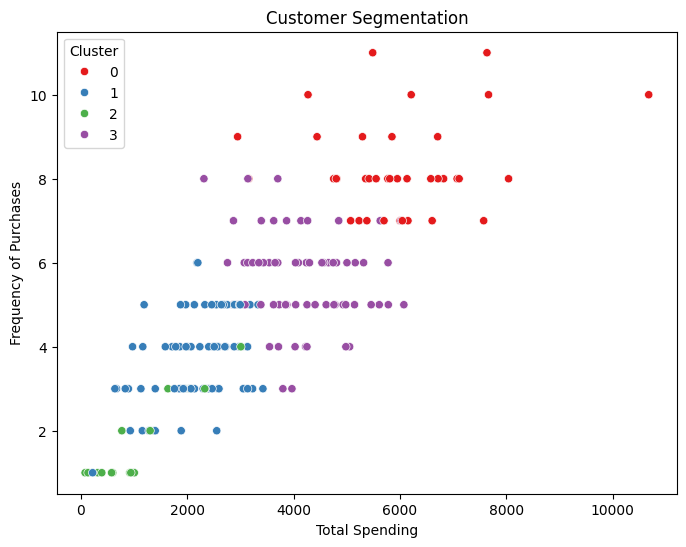

In [3]:
# Visualize the clusters using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_data['total_spending'], y=customer_data['frequency'], hue=customer_data['Cluster'], palette='Set1')
plt.title('Customer Segmentation')
plt.xlabel('Total Spending')
plt.ylabel('Frequency of Purchases')
plt.legend(title='Cluster')
plt.show()

# Save the clusters
customer_data.to_csv('customer_clusters.csv', index=False)

In [4]:
from google.colab import files

# Download the CSV file
files.download('customer_clusters.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# Read the CSV file into a Pandas DataFrame
customer_clusters = pd.read_csv('/content/customer_clusters.csv')

customer_clusters

,CustomerID,total_spending,frequency,recency,Cluster
0,C0001,3354.52,5,84,3
1,C0002,1862.74,4,54,1
2,C0003,2725.38,4,154,1
3,C0004,5354.88,8,33,0
4,C0005,2034.24,3,83,1
...,...,...,...,...,...
194,C0196,4982.88,4,42,3
195,C0197,1928.65,3,29,1
196,C0198,931.83,2,113,1
197,C0199,1979.28,4,92,1


In [11]:
customer_data.head()

# Display the number of customers in each cluster
cluster_counts = customer_data['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
Cluster
1    78
3    67
0    37
2    17
Name: count, dtype: int64


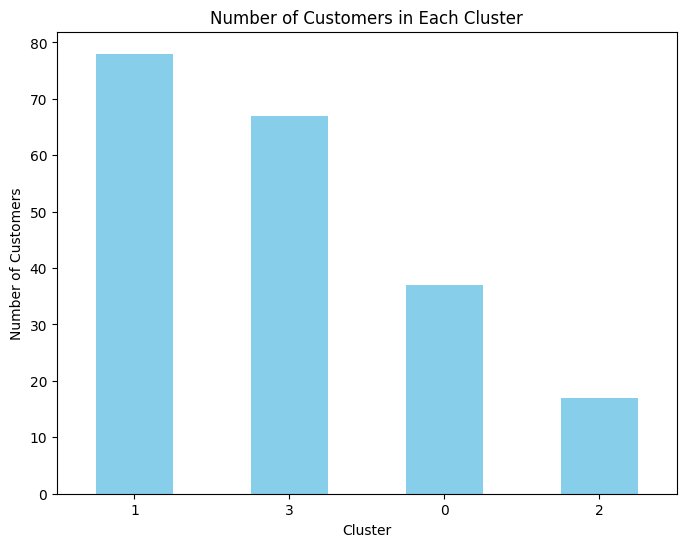

In [12]:
# Plot the distribution of customers across clusters
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()
